In [ ]:


from glob import glob
import os
import pandas as pd
import librosa
import librosa.display
import IPython.display as ipd
from IPython.core.display import display
import seaborn as sns
import random
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
%matplotlib inline
%config InlineBackend.figure_format='retina'
import warnings
warnings.filterwarnings("ignore")

## <a id='partA'>1. The Data</a>

I found a few datasets available for the classification of emotions, each containing small English sentences. They all have the audio samples organized in folders and a documentation, and the common thing is that almost all metadata is embedded in the file names, but written with different keys, which requires individual extraction for each set. Hence, I have I catalogued them, creating dataframes with the same structure, in a way to easily merge them later.

The information retrieved is **path, filename, dataset, sample_rate, gender, age, emotion**.

The data collection processes and details on each dataset are given below:

#### <a id="part1a">CREMA-D</a>

**Link**: https://github.com/CheyneyComputerScience/CREMA-D <br/>
**Source**: Cheyney University of Pennsylvania <br/>
**Licence**: Open Data Commons Open Database License (ODbL) v1.0 <br/>
**Description**: CREMA-D is a data set of 7,442 original clips from 91 actors. The clips were from 48 male and 43 female actors between the ages of 20 and 74 coming from a variety of races and ethnicities. Actors spoke from a selection of 12 sentences. The sentences were presented using one of six different emotions (Anger, Disgust, Fear, Happy, Neutral and Sad). <br/>
**Metadata**: `Age` and `Gender` information can be found in a separate .csv file, while the emotion is embedded in the file name, where `SAD`, `ANG`, `DIS`, `FEA`, `HAP` and `NEU` stands for sad, angry, disgusted, fear, happy and neutral.

In [ ]:
# getting the path of the files from the CREMA-D dataset folder
crema_d_paths = sorted(filter(os.path.isfile, glob('../Audio files/CREMA-D/*.wav')))

# getting gender and age data from annexed `csv` file
info_c = pd.read_csv('CREMA-D_demographic.csv')
info_c.head(3)

ActorID  Age     Sex
0     1001   51    Male
1     1002   21  Female
2     1003   21  Female

In [ ]:
# creating lists to store extracted values
filenames_c, duration_c, sr_c, gender_c, age_c, emotion_c = [], [], [], [], [], []

# iterate through each file path and extract metadata
for file in crema_d_paths:
    # get filenames using slicing string
    filenames_c.append(file[23:-4])
    # get audio lenght, in seconds
    duration_c.append(round(librosa.get_duration(filename=file), 3))
    # get sample rate
    sr_c.append(librosa.get_samplerate(file))
    # get id of the speaker
    actor = int(file[23:27])
    # get gender
    gender_c.append(info_c[info_c['ActorID'] == actor]['Sex'].item().lower())
    # get age
    age_c.append(info_c[info_c['ActorID'] == actor]['Age'].item())
    # get emotion using slicing strings
    if file[32:35] == 'SAD':
        emotion_c.append('sad')
    elif file[32:35] == 'ANG':
        emotion_c.append('angry')
    elif file[32:35] == 'DIS':
        emotion_c.append('disgust')
    elif file[32:35] == 'FEA':
        emotion_c.append('fear')
    elif file[32:35] == 'HAP':
        emotion_c.append('happy')
    elif file[32:35] == 'NEU':
        emotion_c.append('neutral')

# create dataframe
df_c = pd.DataFrame({'path': crema_d_paths,
                   'filename': filenames_c,
                   'dataset' : 'CREMA-D',
                   'duration' : duration_c,
                   'sample_rate' : sr_c,
                   'gender': gender_c,
                   'age' : age_c,
                   'emotion' : emotion_c})

# get few random entries
df_c.sample(3)

path         filename  dataset  \
1823  ../Audio files/CREMA-D/1023_ITS_NEU_XX.wav  1023_ITS_NEU_XX  CREMA-D   
799   ../Audio files/CREMA-D/1010_TSI_NEU_XX.wav  1010_TSI_NEU_XX  CREMA-D   
6827  ../Audio files/CREMA-D/1084_IWL_FEA_XX.wav  1084_IWL_FEA_XX  CREMA-D   

      duration  sample_rate  gender  age  emotion  
1823     2.436        16000    male   22  neutral  
799      2.102        16000  female   27  neutral  
6827     3.303        16000  female   46     fear

#### <a id='part2a'>RAVDESS</a>

**Link**: https://zenodo.org/record/1188976 <br/>
**Source**: Livingstone SR, Russo FA (2018) The Ryerson Audio-Visual Database of Emotional Speech and Song (RAVDESS)<br/>
**Licence**: Creative Commons Attribution license - CC BY-NC-SA 4.0<br/>
**Description**: 1440 files: 60 trials per actor x 24 actors = 1440. The RAVDESS contains 24 professional actors (12 female, 12 male), vocalizing two lexically-matched statements in a neutral North American accent. Speech emotions includes calm, happy, sad, angry, fearful, surprise, and disgust expressions.<br/>
**Metadata**: Each of the 1440 files has a unique filename. The filename consists of a 7-part numerical identifier (e.g., 03-01-06-01-02-01-12.wav). These identifiers define the stimulus characteristics.

<i>Filename</i> identifiers:
- Modality (01 = full-AV, 02 = video-only, 03 = audio-only).
- Vocal channel (01 = speech, 02 = song).
- Emotion (01 = neutral, 02 = calm, 03 = happy, 04 = sad, 05 = angry, 06 = fearful, 07 = disgust, 08 = surprised).
- Emotional intensity (01 = normal, 02 = strong). NOTE: There is no strong intensity for the 'neutral' emotion.
- Statement (01 = "Kids are talking by the door", 02 = "Dogs are sitting by the door").
- Repetition (01 = 1st repetition, 02 = 2nd repetition).
- Actor (01 to 24. Odd numbered actors are male, even numbered actors are female).

<i>Filename example</i>: **03-01-06-01-02-01-12.wav** >>> Audio-only (03), Speech (01), Fearful (06), Normal intensity (01), Statement "dogs" (02), 1st Repetition (01), 12th Actor (12), Female, as the actor ID number is even.

In [ ]:
ravdess_paths = sorted(filter(os.path.isfile, glob('../Audio files/RAVDESS/*/*.wav')))

filenames_r, duration_r, sr_r, gender_r, emotion_r = [], [], [], [], []

for file in ravdess_paths:
    
    filenames_r.append(file[32:-4])
    
    duration_r.append(round(librosa.get_duration(filename=file), 3))
    
    sr_r.append(librosa.get_samplerate(file))
    
    if int(file[-6:-4])%2 == 0:
        gender_r.append('female')
    else:
        gender_r.append('male')

for file in filenames_r:
    if file[6:8] == '01':
        emotion_r.append('neutral')
    elif file[6:8] == '02':
        emotion_r.append('calm')
    elif file[6:8] == '03':
        emotion_r.append('happy')
    elif file[6:8] == '04':
        emotion_r.append('sad')
    elif file[6:8] == '05':
        emotion_r.append('angry')
    elif file[6:8] == '06':
        emotion_r.append('fear')
    elif file[6:8] == '07':
        emotion_r.append('disgust')
    elif file[6:8] == '08':
        emotion_r.append('surprise')
        
df_r = pd.DataFrame({'path': ravdess_paths,
                   'filename': filenames_r,
                   'dataset' : 'RAVDESS',
                   'duration' : duration_r,
                   'sample_rate' : sr_r,
                   'gender': gender_r,
                   'age' : 26,            
                   'emotion' : emotion_r})

df_r.sample(3)

path              filename  \
948   ../Audio files/RAVDESS/Actor_16/03-01-07-02-01...  03-01-07-02-01-02-16   
1071  ../Audio files/RAVDESS/Actor_18/03-01-08-01-01...  03-01-08-01-01-01-18   
1127  ../Audio files/RAVDESS/Actor_19/03-01-07-02-01...  03-01-07-02-01-01-19   

      dataset  duration  sample_rate  gender  age   emotion  
948   RAVDESS     4.238        48000  female   26   disgust  
1071  RAVDESS     3.370        48000  female   26  surprise  
1127  RAVDESS     4.805        48000    male   26   disgust

#### <a id='part3a'>SAVEE</a>

**Link**: http://kahlan.eps.surrey.ac.uk/savee/ <br/>
**Source**: University of Surrey<br/>
**Licence**: Open licence with registration<br/>
**Description**: SAVEE (Surrey Audio-Visual Expressed Emotion) is an emotion recognition dataset. It consists of recordings from 4 male (postgraduate students and researchers aged from 27 to 31 years) in 7 different emotions, 480 British English utterances in total. The sentences were chosen from the standard TIMIT corpus and phonetically-balanced for each emotion.<br/>
**Metadata**: Each speaker is identified in a different folder as DC, JE, JK, KL. The emotions is encoded as a letter in the filename, where `a` equals angry, `d` disgust, `f` fear, `h` happy, `n` neutral, `sa` sad and `su` for surprised.

In [ ]:
savee_paths = sorted(filter(os.path.isfile, glob('../Audio files/SAVEE/*/*.wav')))

filenames_s, duration_s, sr_s, emotion_s = [], [], [], []

for file in savee_paths:
    
    filenames_s.append(file[24:-4])
    
    duration_s.append(round(librosa.get_duration(filename=file), 3))
    
    sr_s.append(librosa.get_samplerate(file))
    
    if file[27:28] == 'a':
        emotion_s.append('angry')
    elif file[27:28] == 'd':
        emotion_s.append('disgust')
    elif file[27:28] == 'f':
        emotion_s.append('fear')
    elif file[27:28] == 'h':
        emotion_s.append('happy')
    elif file[27:28] == 'n':
        emotion_s.append('neutral')
    elif file[27:28] == 's':
        if file[27:29] == 'sa':
            emotion_s.append('sad')
        else:
            emotion_s.append('surprise')
            
df_s = pd.DataFrame({'path': savee_paths,
                   'filename': filenames_s,
                   'dataset' : 'SAVEE',
                   'duration' : duration_s,
                   'sample_rate' : sr_s,
                   'gender': 'male',
                   'age' : 29,            
                   'emotion' : emotion_s})

df_s.sample(3)

path filename dataset  duration  \
34   ../Audio files/SAVEE/DC/dc_f05.wav   dc_f05   SAVEE     3.291   
194  ../Audio files/SAVEE/JE/je_n15.wav   je_n15   SAVEE     5.458   
184  ../Audio files/SAVEE/JE/je_n05.wav   je_n05   SAVEE     4.363   

     sample_rate gender  age  emotion  
34         44100   male   29     fear  
194        44100   male   29  neutral  
184        44100   male   29  neutral

#### <a id='part4a'>TESS</a>

**Link**: https://tspace.library.utoronto.ca/handle/1807/24487 <br/>
**Source**: University of Toronto<br/>
**Licence**: Creative Commons license Attribution - NonCommercial - NoDerivatives 4.0 Internationa<br/>
**Description**: A set of 200 target words were spoken in the carrier phrase "Say the word _____' by two actresses (aged 26 and 64 years) and recordings were made of the set portraying each of seven emotions (anger, disgust, fear, happiness, pleasant surprise, sadness, and neutral). There are 2800 stimuli in total.
Two actresses were recruited from the Toronto area. Both actresses speak English as their first language, are university educated, and have musical training. Audiometric testing indicated that both actresses have thresholds within the normal range.<br/>
**Metadata**: `OAF` and `YAF` to identify the age of the woman, the emotions are embedded in the filename with their names, with the exeption for the 'surpise' emotion labeled as `ps`.

In [ ]:
tess_paths = sorted(filter(os.path.isfile, glob('../Audio files/TESS/*.wav')))

filenames_t, duration_t, sr_t, age_t, emotion_t = [], [], [], [], []

for file in tess_paths:
    
    filenames_t.append(file[20:-4])
    
    duration_t.append(round(librosa.get_duration(filename=file), 3)) 
    
    sr_t.append(librosa.get_samplerate(file))
    
    if file[20:23] == 'OAF':
        age_t.append(64)
    else:
        age_t.append(26)
        
for file in filenames_t:
    splitted = file.split('_')
    emotion_t.append(splitted[-1])
    
emotion_t = list(map(lambda x: x.replace('ps', 'surprise'), emotion_t))

df_t = pd.DataFrame({'path': tess_paths,
                   'filename': filenames_t,
                   'dataset' : 'TESS',
                   'duration' : duration_t,
                   'sample_rate' : sr_t,
                   'gender': 'female',
                   'age' : age_t,
                   'emotion' : emotion_t})

df_t.sample(3)

path       filename dataset  duration  \
1808  ../Audio files/TESS/YAF_have_fear.wav  YAF_have_fear    TESS     1.951   
2172  ../Audio files/TESS/YAF_near_fear.wav  YAF_near_fear    TESS     1.644   
745   ../Audio files/TESS/OAF_mop_happy.wav  OAF_mop_happy    TESS     2.181   

      sample_rate  gender  age emotion  
1808        24414  female   26    fear  
2172        24414  female   26    fear  
745         24414  female   64   happy

#### <a id='part5a'>EmoV-DB</a>

**Link**: https://github.com/numediart/EmoV-DB <br/>
**Source**: UMONS Institute for Creative Technologies - University Of Mons<br/>
**Licence**: Free for non-commercial purposes<br/>
**Description**: The Emotional Voices Database includes recordings for four speakers - two males and two females. The emotional styles are neutral, sleepiness, anger, disgust and amused. Each audio file is recorded in 16bits .wav format. <br/>
**Metadata**: Each folder has the name of the speaker, with `bea` and `jenie` being the females, and `sam` and `josh` the males. Then in the file name the first word is the emotion style, example `anger_1-28_0011.wav` for angry.

In [ ]:
emov_db_paths = sorted(filter(os.path.isfile, glob('../Audio files/EmoV_DB/*/*.wav')))

filenames_e, duration_e, sr_e, gender_e, emotion_e = [], [], [], [], []

for file in emov_db_paths:
    
    filenames_e.append(file.split('/')[-1][:-4])
    
    duration_e.append(round(librosa.get_duration(filename=file), 3))
    
    sr_e.append(librosa.get_samplerate(file))
    
    if file[23:25] in ['be','je']:
        gender_e.append('female')
    else:
        gender_e.append('male')
    
for file in filenames_e:
    if file[4:6] == 'am':
        emotion_e.append('amused')
    elif file[4:6] == 'an':
        emotion_e.append('angry')
    elif file[4:6] in ['di','Di']:
        emotion_e.append('disgust')
    elif file[4:6] in ['ne','Ne']:
        emotion_e.append('neutral')
    elif file[4:6] == 'sl':
        emotion_e.append('sleepy')
        
df_e = pd.DataFrame({'path': emov_db_paths,
                   'filename': filenames_e,
                   'dataset' : 'EmoV_DB',
                   'duration' : duration_e,
                   'sample_rate' : sr_e,
                   'gender': gender_e,
                   'age' : 30,         
                   'emotion' : emotion_e})

df_e.sample(3)

path  \
3134  ../Audio files/EmoV_DB/jenie_Sleepy/jen_sleepi...   
6263  ../Audio files/EmoV_DB/sam_Neutral/sam_neutral...   
5971  ../Audio files/EmoV_DB/sam_Neutral/sam_neutral...   

                      filename  dataset  duration  sample_rate  gender  age  \
3134  jen_sleepiness_1-28_0024  EmoV_DB     6.381        16000  female   30   
6263  sam_neutral_421-448_0425  EmoV_DB     3.701        16000    male   30   
5971  sam_neutral_141-168_0157  EmoV_DB     4.264        16000    male   30   

      emotion  
3134   sleepy  
6263  neutral  
5971  neutral

#### <a id='part6a'>JL-Corpus</a>

**Link**: https://dagshub.com/hazalkl/JL-Corpus<br/>
**Source**: Jesin James, Li Tian, Catherine Watson, "An Open Source Emotional Speech Corpus for Human Robot Interaction Applications", in Proc. Interspeech, 2018, University of Auckland<br/>
**Licence**: CC0: Public Domain<br/>
**Description**: Emotional speech database in New Zealand English, named as JL corpus. The proposed database has the voice from 4 speakers - 2 male and 2 female. In contrast to the existing speech corpora, this corpus was constructed by maintaining an equal distribution of 4 long vowels. 5 (main emotions) * 2 (repetitions) * 15 (sentences) + 6 (sub emotions) * 2 (repetitions) * 10 (sentences) = 150 + 120 = 270 sentences per person. Total = 4 (number of speakers) * 270 = 1080 sentences.<br/>
**Metadata**: File naming rule: (Gender)(speaker.ID)(Emotion)(Sentence.ID)(session.ID). E.g: `female1_angry_1a_1.wav`

In [ ]:
jl_paths = sorted(filter(os.path.isfile, glob('../Audio files/JL-Corpus/*.wav')))

filenames_j, duration_j, sr_j, gender_j, emotion_j = [], [], [], [], []

for file in jl_paths:
    
    filenames_j.append(file[25:-4])
    
    duration_j.append(round(librosa.get_duration(filename=file), 3))
    
    sr_j.append(librosa.get_samplerate(file))
    
    if file[25:31] == 'female':
        gender_j.append('female')
    else:
        gender_j.append('male')

for file in filenames_j:
    emotion_j.append(file.split('_')[1])
    
df_j = pd.DataFrame({'path': jl_paths,
                   'filename': filenames_j,
                   'dataset' : 'JL-Corpus',
                   'duration' : duration_j,
                   'sample_rate' : sr_j,
                   'gender': gender_j,
                   'age' : 30,        
                   'emotion' : emotion_j})

df_j.sample(3)

path             filename  \
304  ../Audio files/JL-Corpus/female2_happy_11a_1.wav  female2_happy_11a_1   
308  ../Audio files/JL-Corpus/female2_happy_12a_1.wav  female2_happy_12a_1   
801    ../Audio files/JL-Corpus/male2_happy_15a_2.wav    male2_happy_15a_2   

       dataset  duration  sample_rate  gender  age emotion  
304  JL-Corpus      2.10        44100  female   30   happy  
308  JL-Corpus      1.80        44100  female   30   happy  
801  JL-Corpus      2.05        44100    male   30   happy

### Merge the data

In [ ]:
df = pd.concat([df_c, df_r, df_s, df_t, df_e, df_j])

df = df[df['emotion'].str.contains('amused|calm|sleepy') == False].reset_index(drop=True)
print('The dataset has {} audio files. Below printed 10 random entries:'.format(df.shape[0]))
df.sample(10)

The dataset has 16783 audio files. Below printed 10 random entries:


path  \
5168          ../Audio files/CREMA-D/1064_IEO_SAD_MD.wav   
7917   ../Audio files/RAVDESS/Actor_10/03-01-03-02-01...   
10701             ../Audio files/TESS/YAF_chat_angry.wav   
4168          ../Audio files/CREMA-D/1052_DFA_SAD_XX.wav   
9617            ../Audio files/TESS/OAF_hurl_disgust.wav   
15520  ../Audio files/EmoV_DB/sam_Neutral/sam_neutral...   
11714                ../Audio files/TESS/YAF_sure_ps.wav   
10184           ../Audio files/TESS/OAF_sail_disgust.wav   
8454   ../Audio files/RAVDESS/Actor_20/03-01-05-02-02...   
7241          ../Audio files/CREMA-D/1089_IWW_ANG_XX.wav   

                       filename  dataset  duration  sample_rate  gender  age  \
5168            1064_IEO_SAD_MD  CREMA-D     2.736        16000    male   53   
7917       03-01-03-02-01-02-10  RAVDESS     3.503        48000  female   26   
10701            YAF_chat_angry     TESS     2.372        24414  female   26   
4168            1052_DFA_SAD_XX  CREMA-D     2.336        16000  female   33   
9617           OAF_hurl_disgust     TESS     2.268        24414  female   64   
15520  sam_neutral_281-308_0282  EmoV_DB     3.989        16000    male   30   
11714               YAF_sure_ps     TESS     2.231        24414  female   26   
10184          OAF_sail_disgust     TESS     2.609        24414  female   64   
8454       03-01-05-02-02-01-20  RAVDESS     4.404        48000  female   26   
7241            1089_IWW_ANG_XX  CREMA-D     2.436        16000  female   24   

        emotion  
5168        sad  
7917      happy  
10701     angry  
4168        sad  
9617    disgust  
15520   neutral  
11714  surprise  
10184   disgust  
8454      angry  
7241      angry

## <a id='partB'>2. Ensuring data compatibility</a>

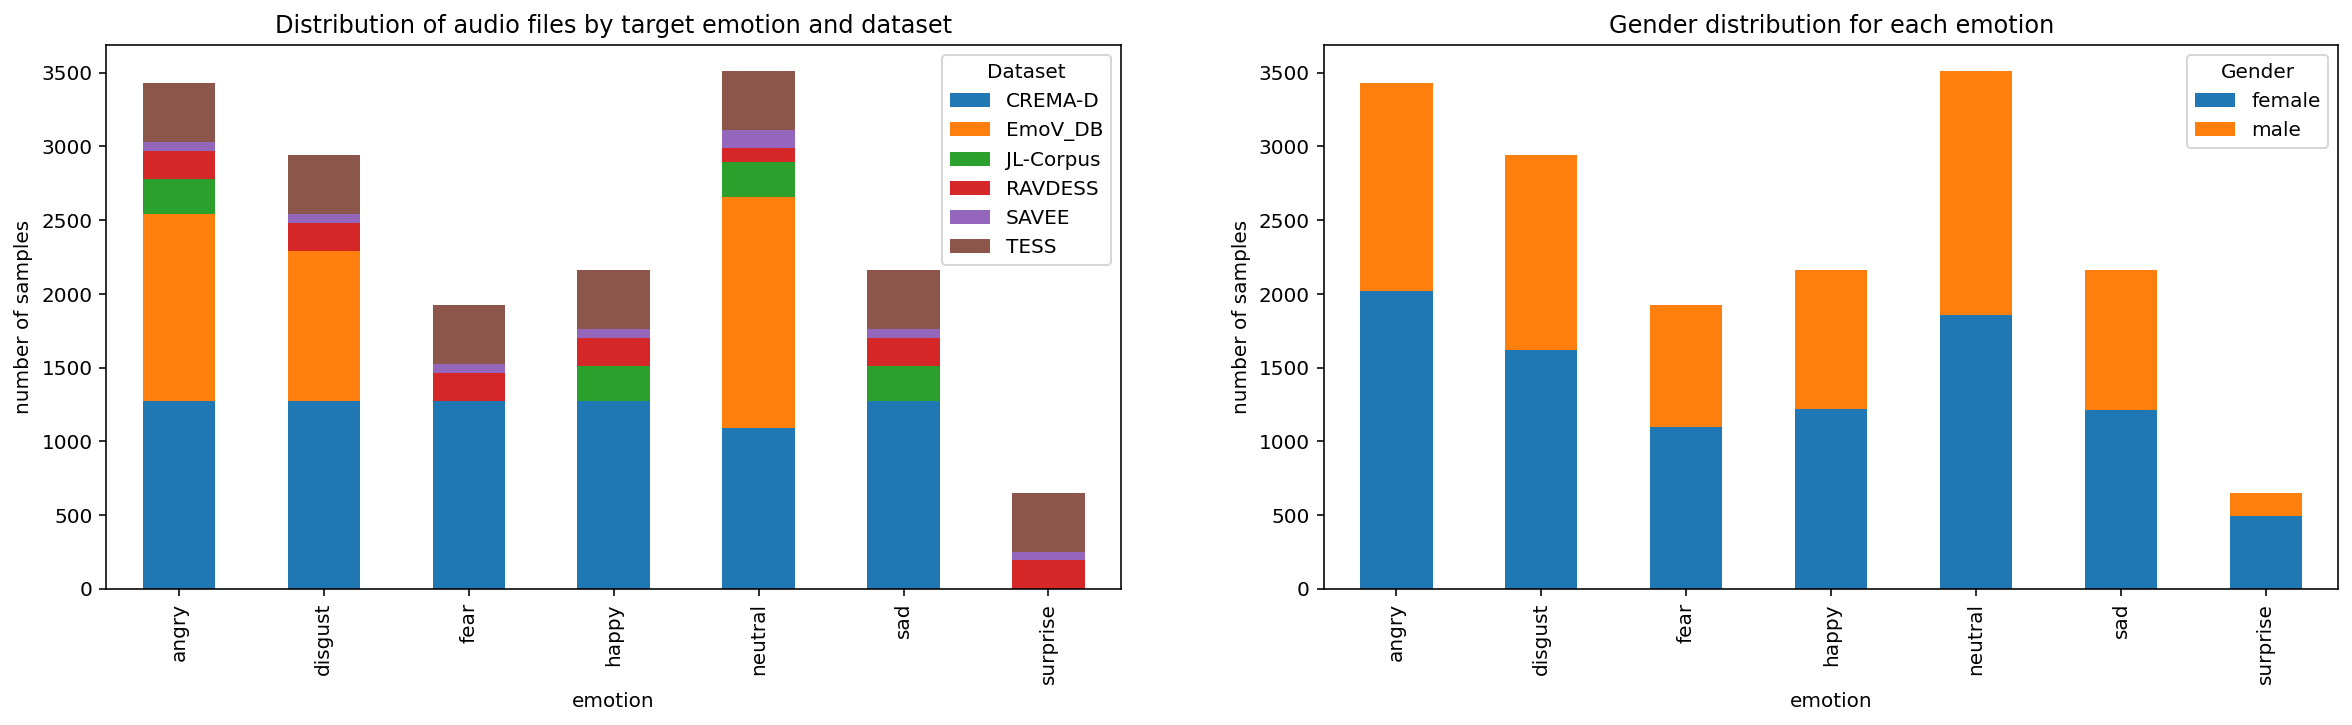

In [ ]:
# Creating a figure with 2 subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 5))

df.groupby(['emotion', 'dataset']).size().unstack().plot(kind='bar', stacked=True, ax=axes[0])
axes[0].set_title('Distribution of audio files by target emotion and dataset')
axes[0].set_ylabel('number of samples')
axes[0].legend(title='Dataset')

df.groupby(['emotion', 'gender']).size().unstack().plot(kind='bar', stacked=True, ax=axes[1])
axes[1].set_title('Gender distribution for each emotion')
axes[1].set_ylabel('number of samples')
axes[1].legend(title='Gender')

plt.show()

Checking the sources, some inequalities in the amount of samples are noted, with the `surprise` category having fewer audio files linked to its category than the other types.

The distribution by gender is quite similar, with slightly more samples of female voices in general.

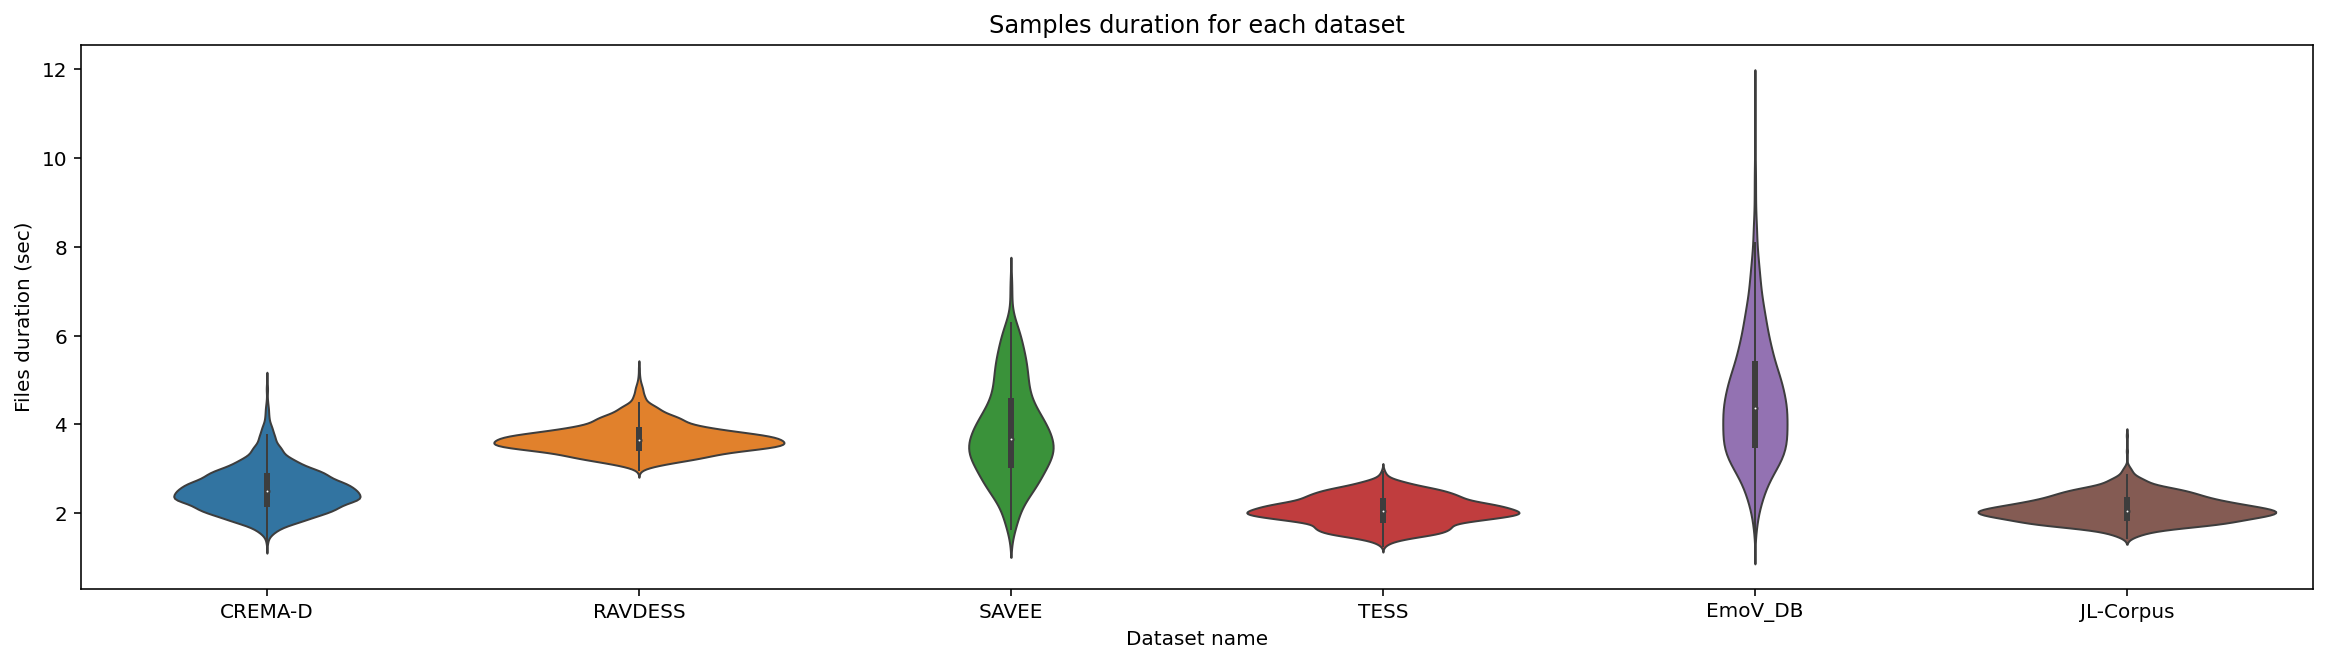

In [ ]:
# Check duration distribution by each source using violin plots
plt.figure(figsize=(20,5))
sns.violinplot(x=df['dataset'],y=df['duration'], linewidth=1)
plt.xlabel('Dataset name')
plt.ylabel('Files duration (sec)')
plt.title('Samples duration for each dataset', size=12)
plt.show()

The samples length is similar across each source, with an average between 2 and 5 seconds for audio file.

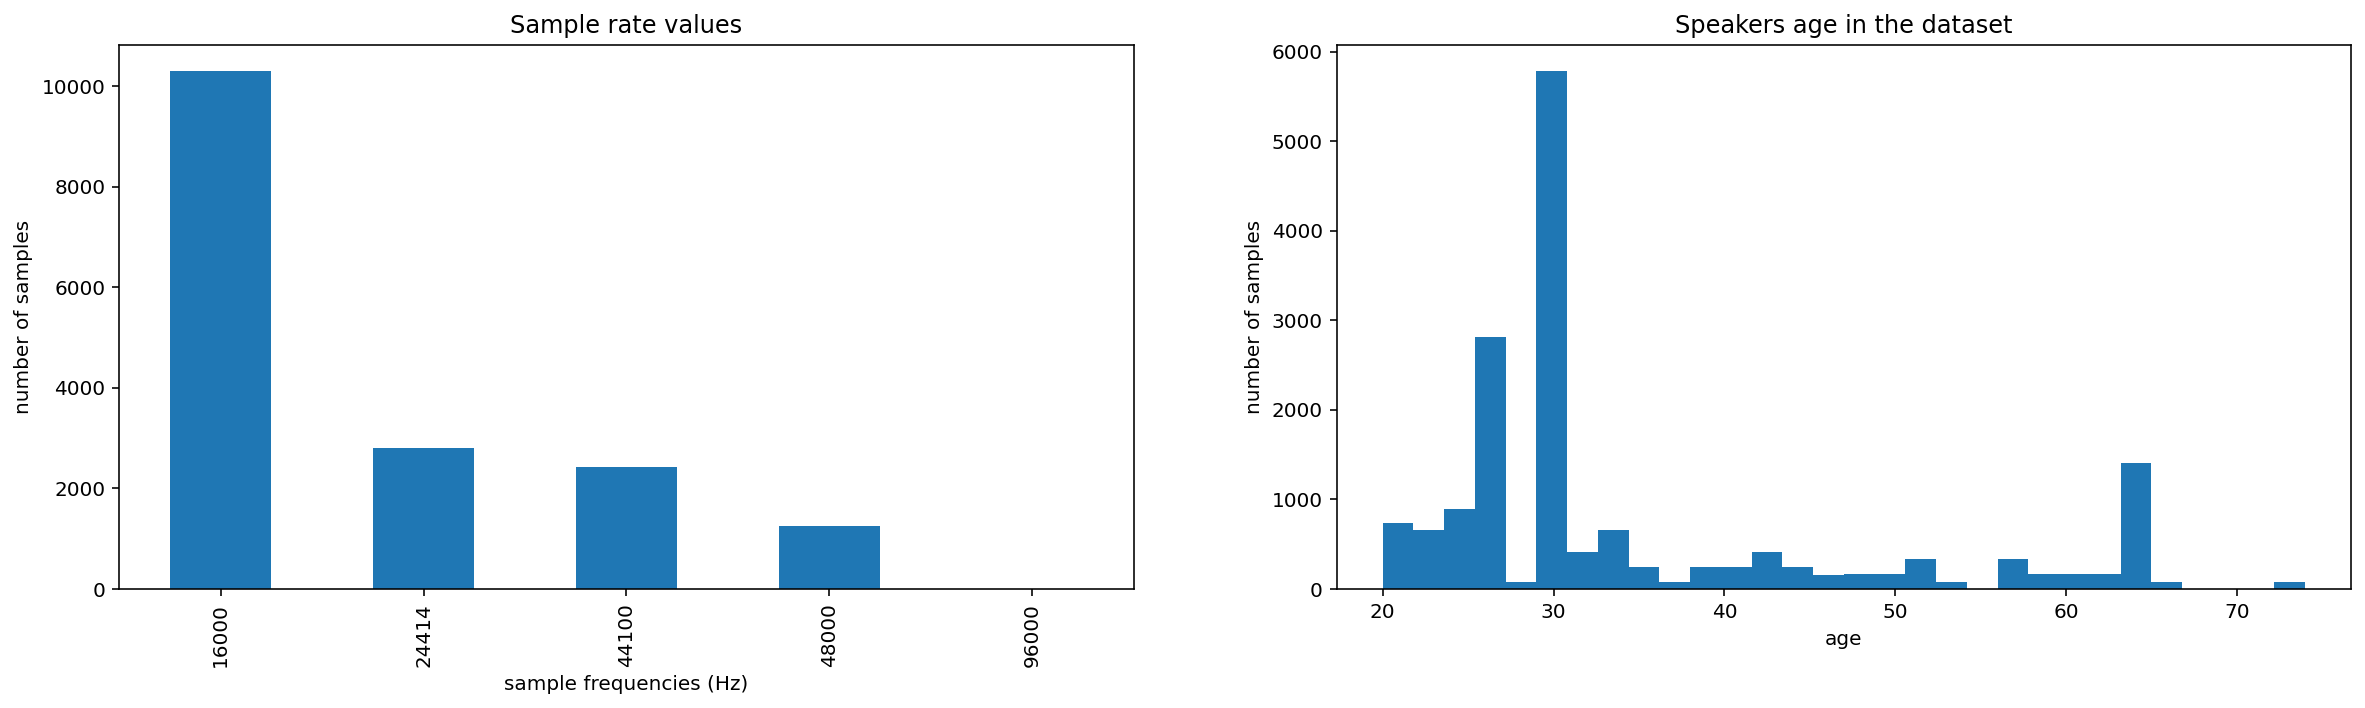

In [ ]:
# Creating a figure with 2 subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 5))

for c in ["sample_rate"]:
    df[c].value_counts().plot.bar(ax=axes[0])
axes[0].set_title('Sample rate values')
axes[0].set_xlabel('sample frequencies (Hz)')
axes[0].set_ylabel('number of samples')
    
plt.title('Speakers age in the dataset')
df['age'].hist(bins=30, grid=False, ax=axes[1])
axes[1].set_xlabel('age')
axes[1].set_ylabel('number of samples')
plt.show()

Sampling frequency is not equal and needs to be addressed.
The age of the speakers peaks at 30 years, but many data are missing and have been replaced with average values from the different documentations.


In [ ]:
# function to display samples information by dataset and emotion
# note that a random samples is generated each time the function is called
# this is on purpose as to check different samples each time

def show_audio(dataset, emotion):
    
    fig, axs = plt.subplots(nrows=1,ncols=3, figsize=(20,4))
    df_show = df.loc[(df.dataset == dataset) & (df['emotion'] == emotion)].reset_index(drop=True)
    index = random.randint(0, df_show.shape[0])
    
    y, sr = librosa.load(df_show.path[index], sr=df.sample_rate[index])
    librosa.display.waveplot(y, sr=sr, ax=axs[0])
    axs[0].set_title('Waveform')
    
    f0, _, _ = librosa.pyin(y, sr=sr, fmin=50, fmax=1500, frame_length=2048)

    timepoints = np.linspace(0, df_show.duration[index], num=len(f0), endpoint=False)
    x_stft = np.abs(librosa.stft(y))
    x_stft = librosa.amplitude_to_db(x_stft, ref=np.max)
    
    librosa.display.specshow(x_stft, sr=sr, x_axis="time", y_axis="log", ax=axs[1])
    
    axs[1].plot(timepoints, f0, color="cyan", linewidth=4)
    axs[1].set_title('Spectrogram with fundamental frequency')
    x_mfccs = librosa.feature.mfcc(y, sr=sr, n_mfcc=20)
    librosa.display.specshow(x_mfccs, sr=sr, x_axis="time", norm=Normalize(vmin=-50, vmax=50), ax=axs[2])
    axs[2].set_title('MFCCs')
    plt.suptitle('Filename: {}  -  Dataset: {}  -  Gender: {}  -  Age: {}  -  Emotion: {}'.format(df_show.filename[index],
                                                                                                  df_show.dataset[index],
                                                                                                  df_show.gender[index],
                                                                                                  df_show.age[index],
                                                                                                  df_show.emotion[index]), size=14)
    plt.tight_layout()
    plt.show()
    display(ipd.Audio(y, rate=sr))

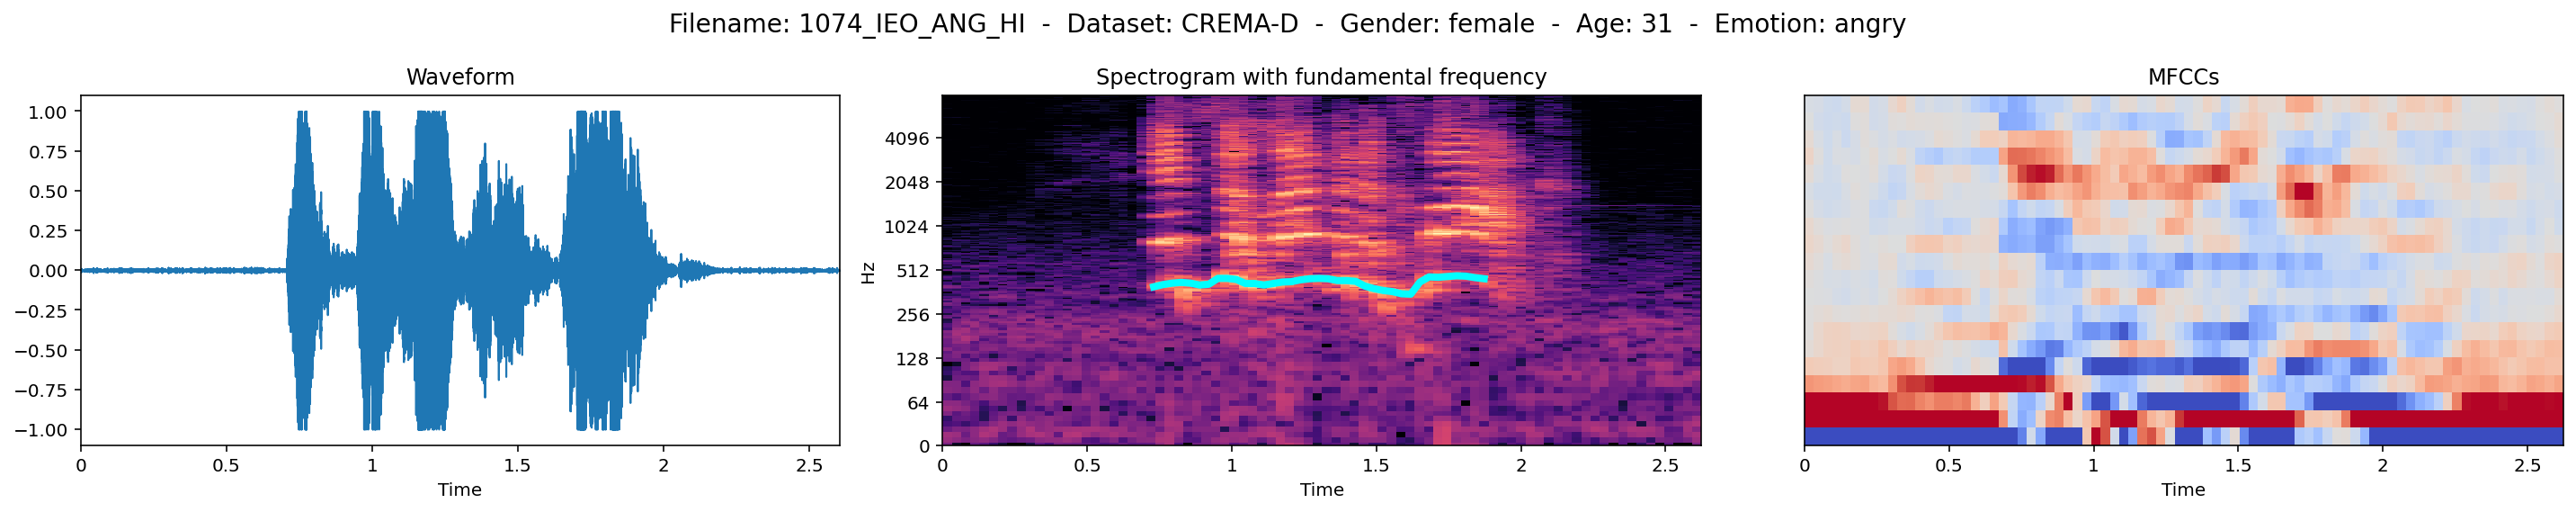

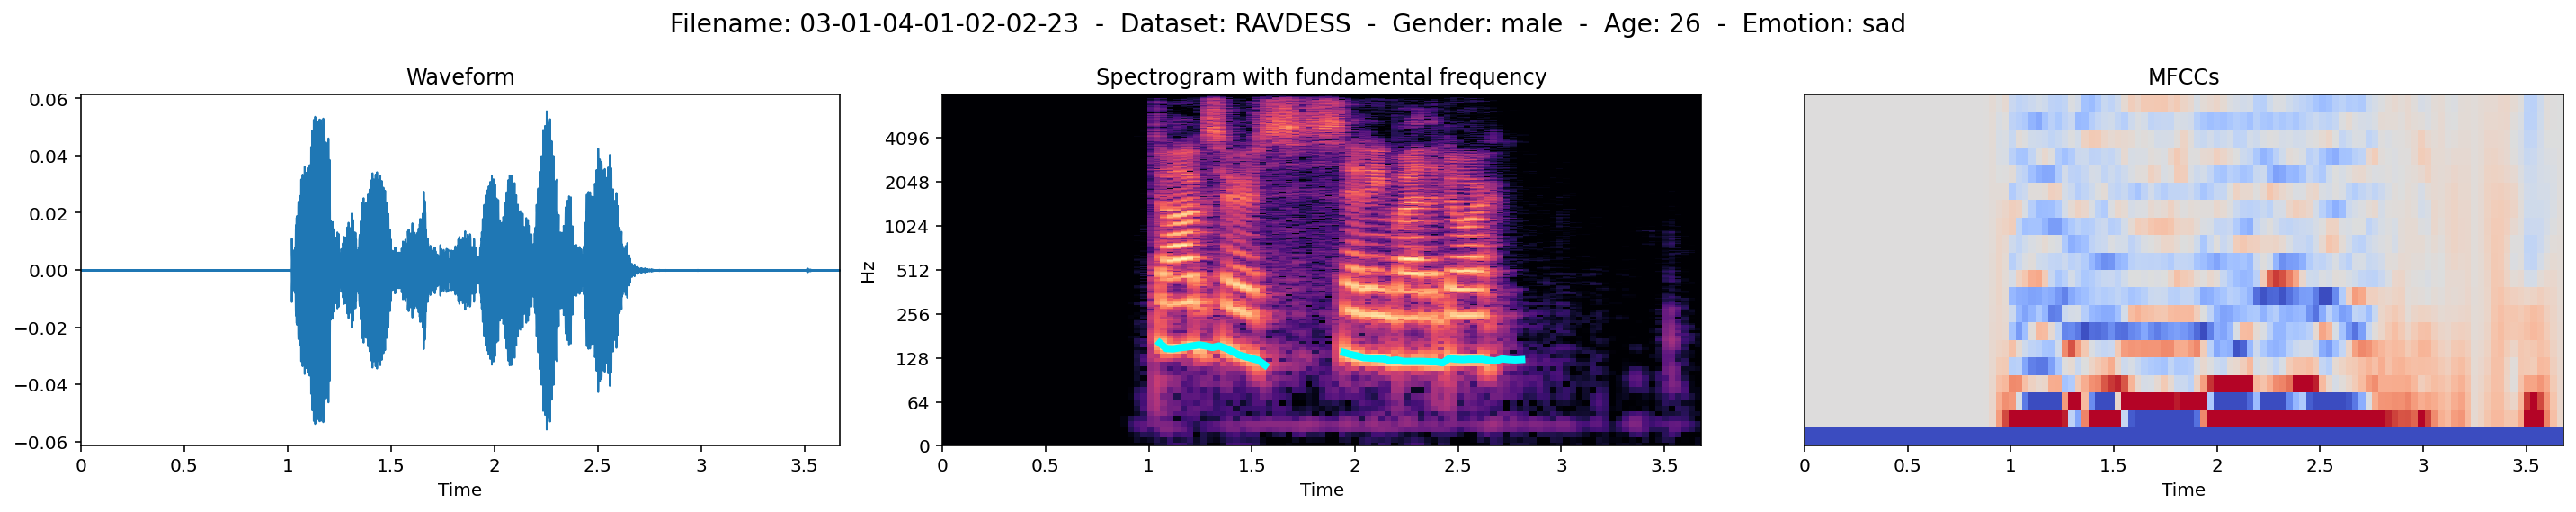

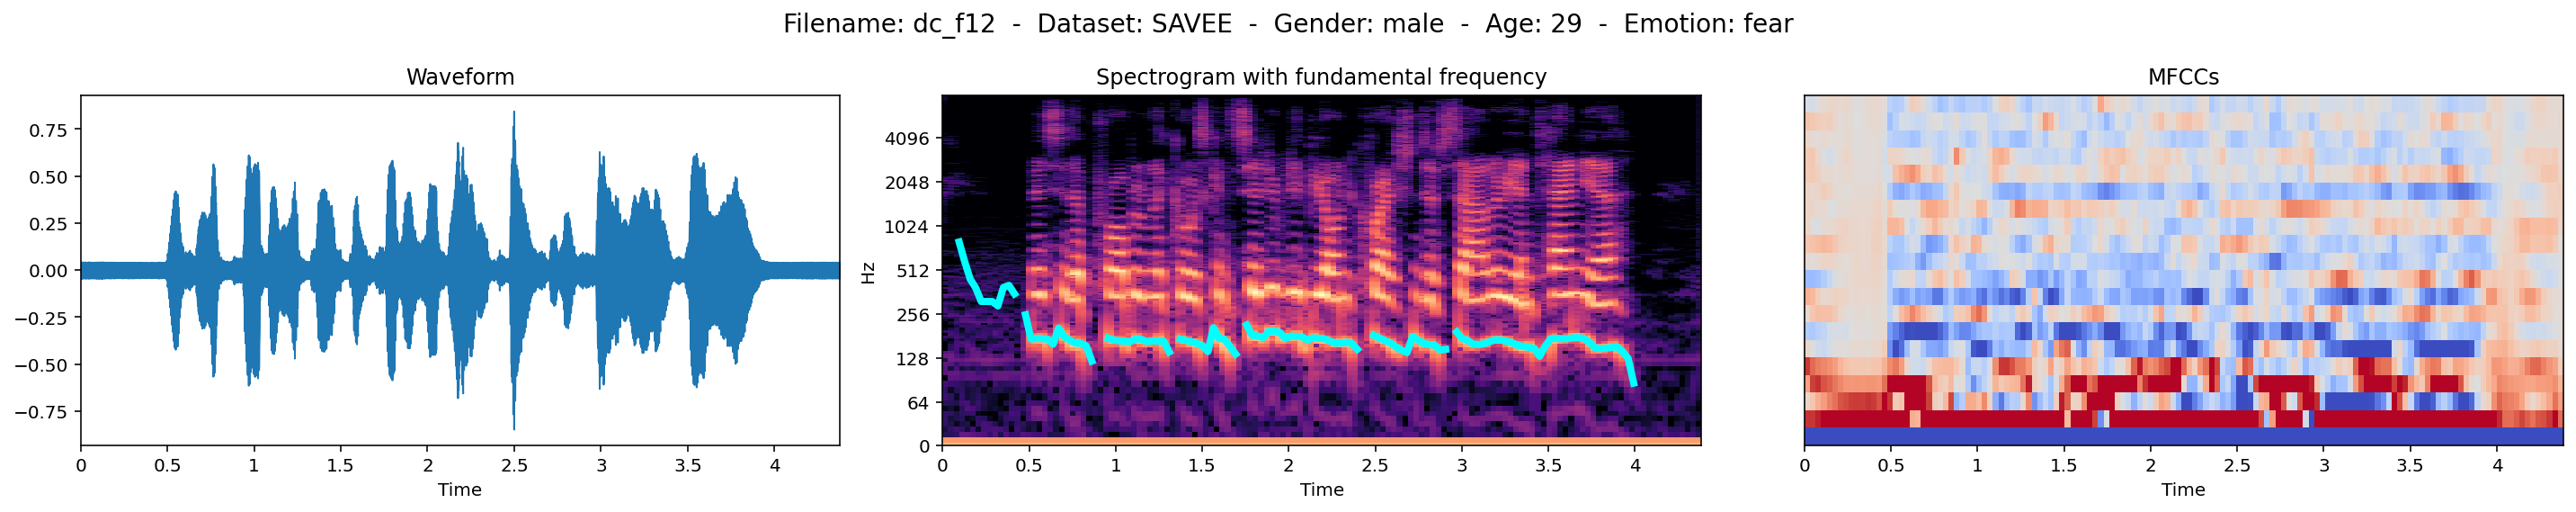

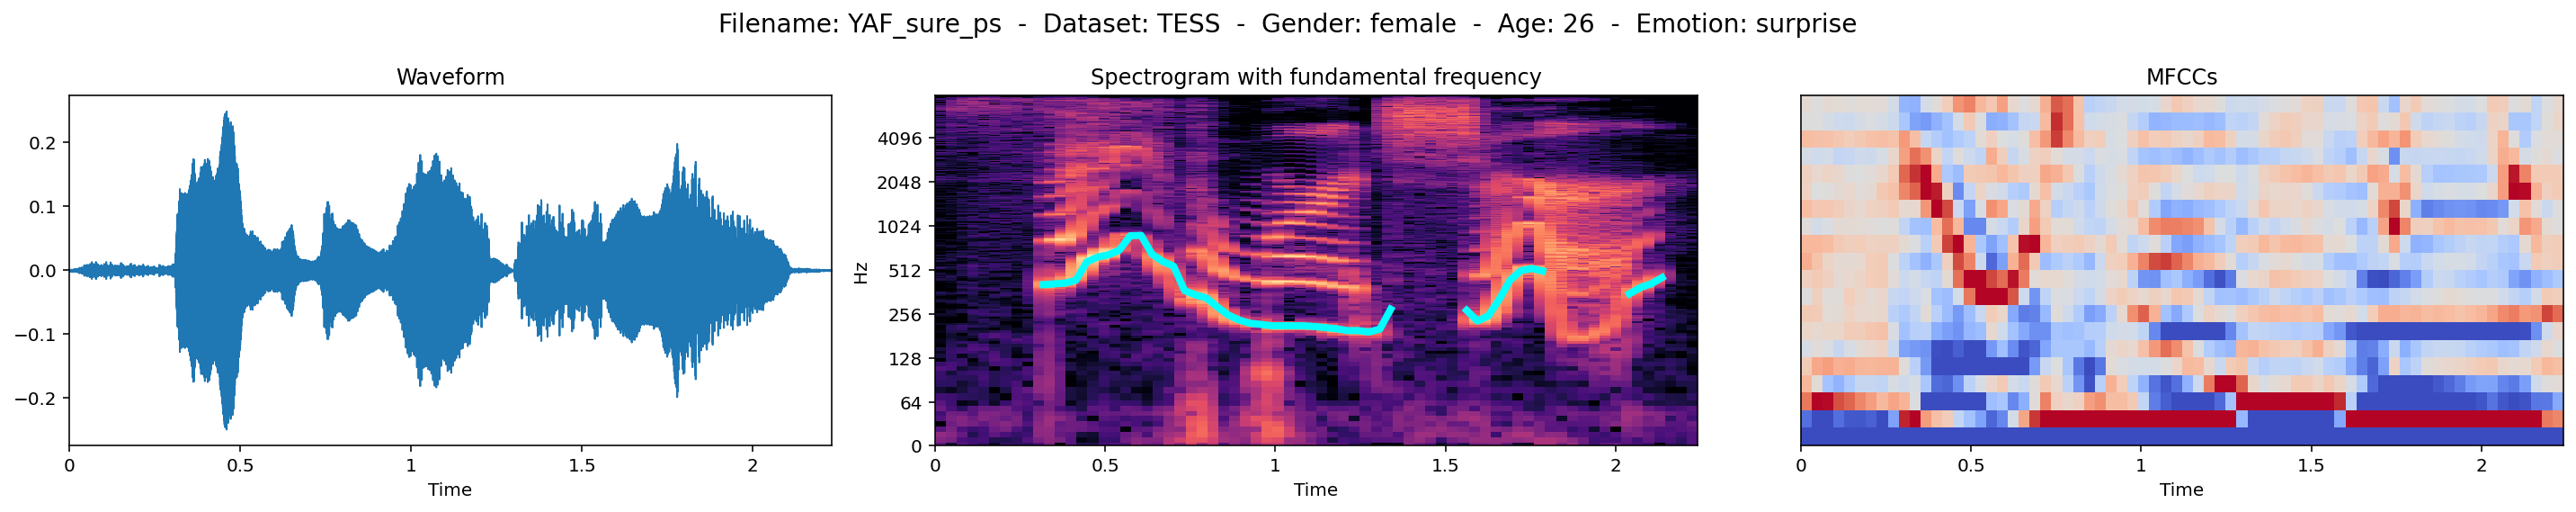

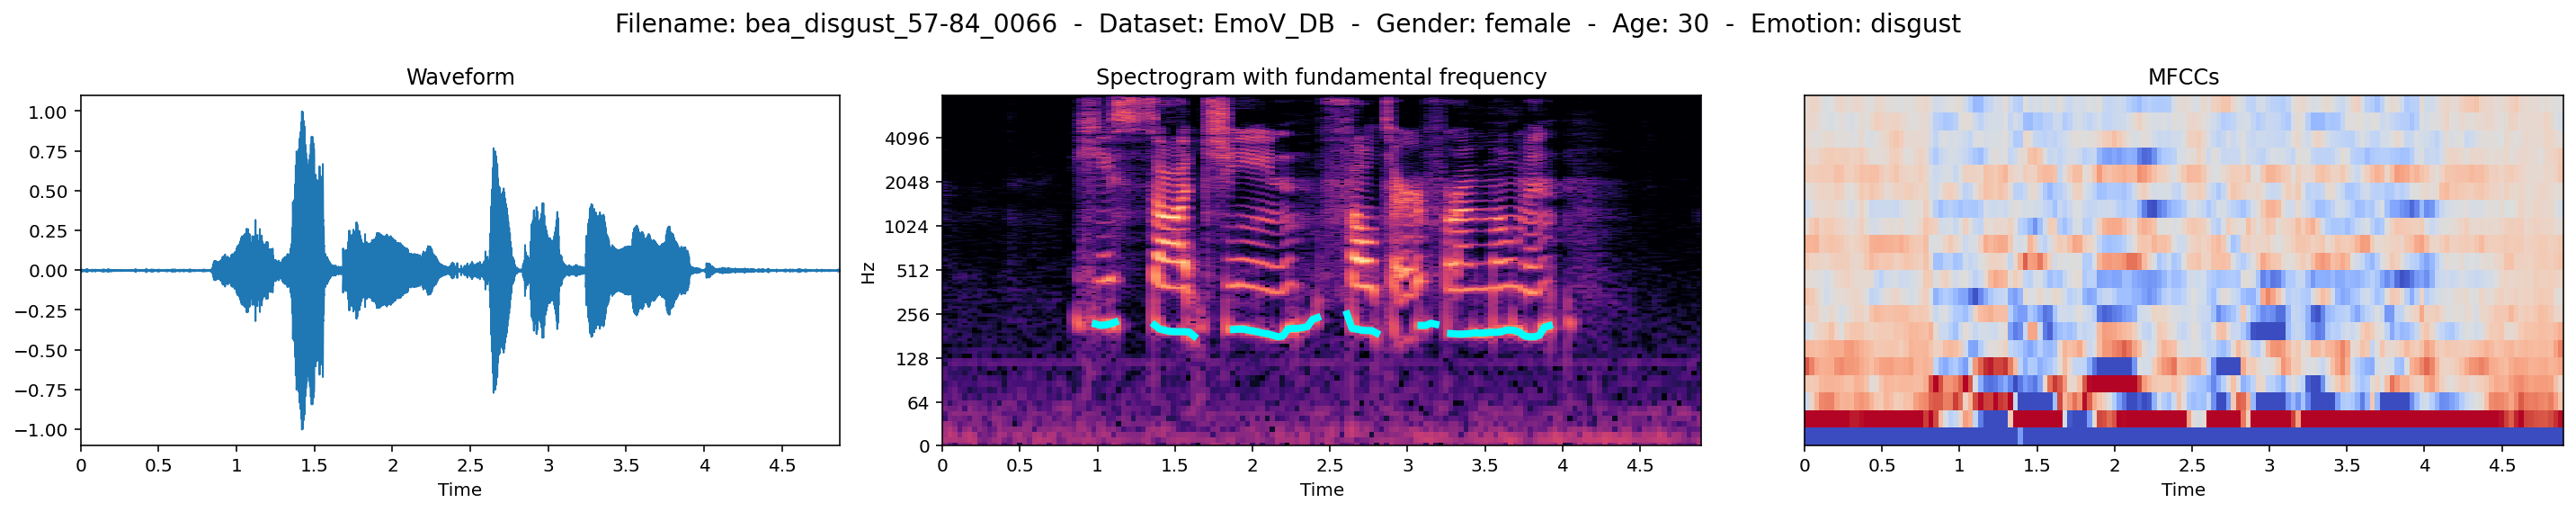

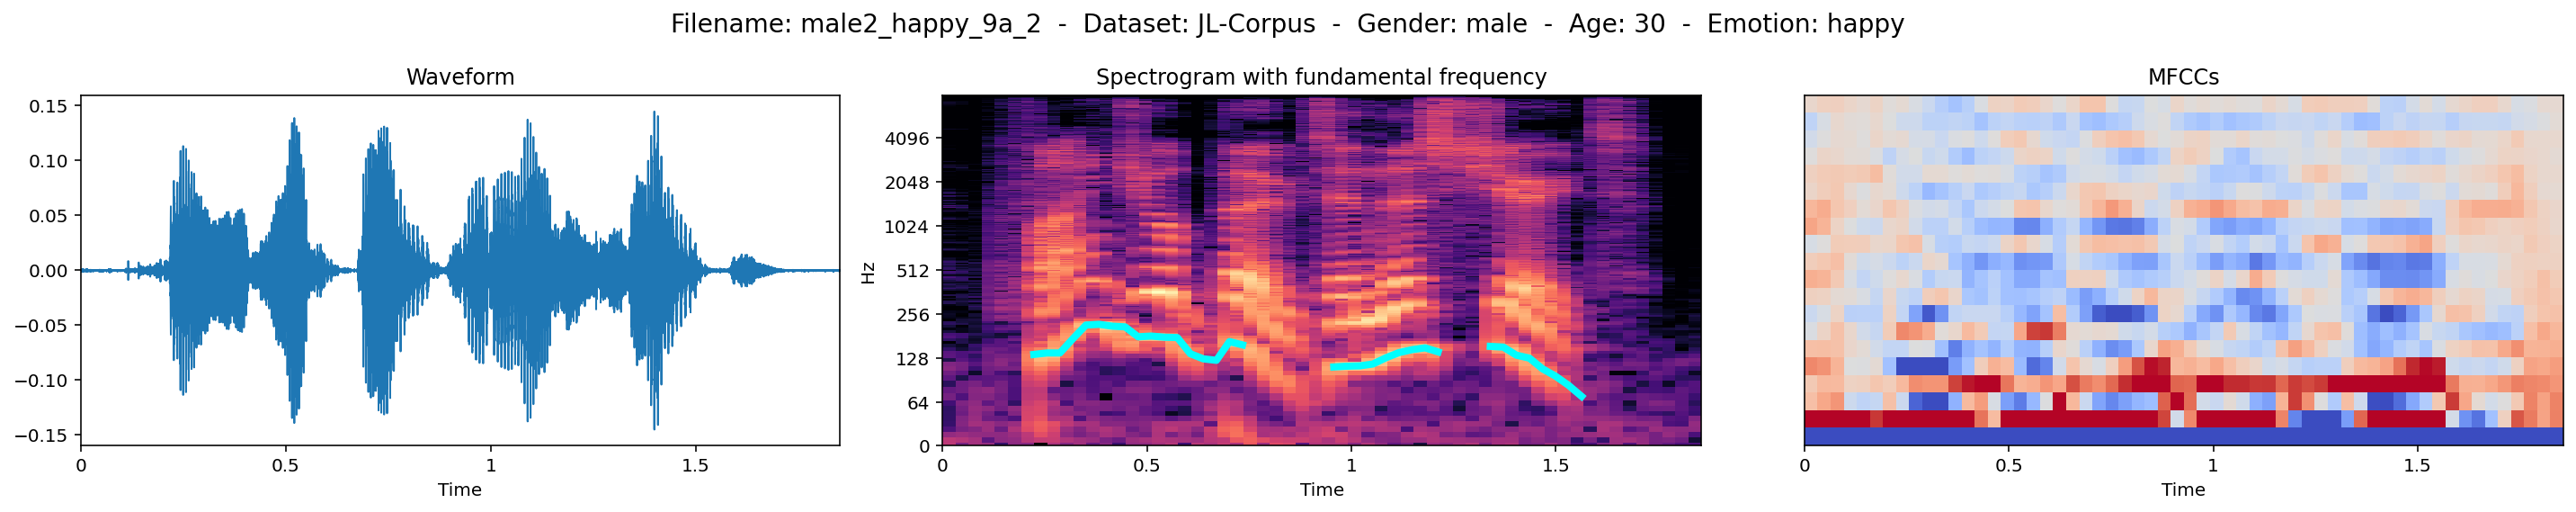

In [ ]:
show_audio('CREMA-D', 'angry')
show_audio('RAVDESS', 'sad')
show_audio('SAVEE', 'fear')
show_audio('TESS', 'surprise')
show_audio('EmoV_DB', 'disgust')
show_audio('JL-Corpus', 'happy')

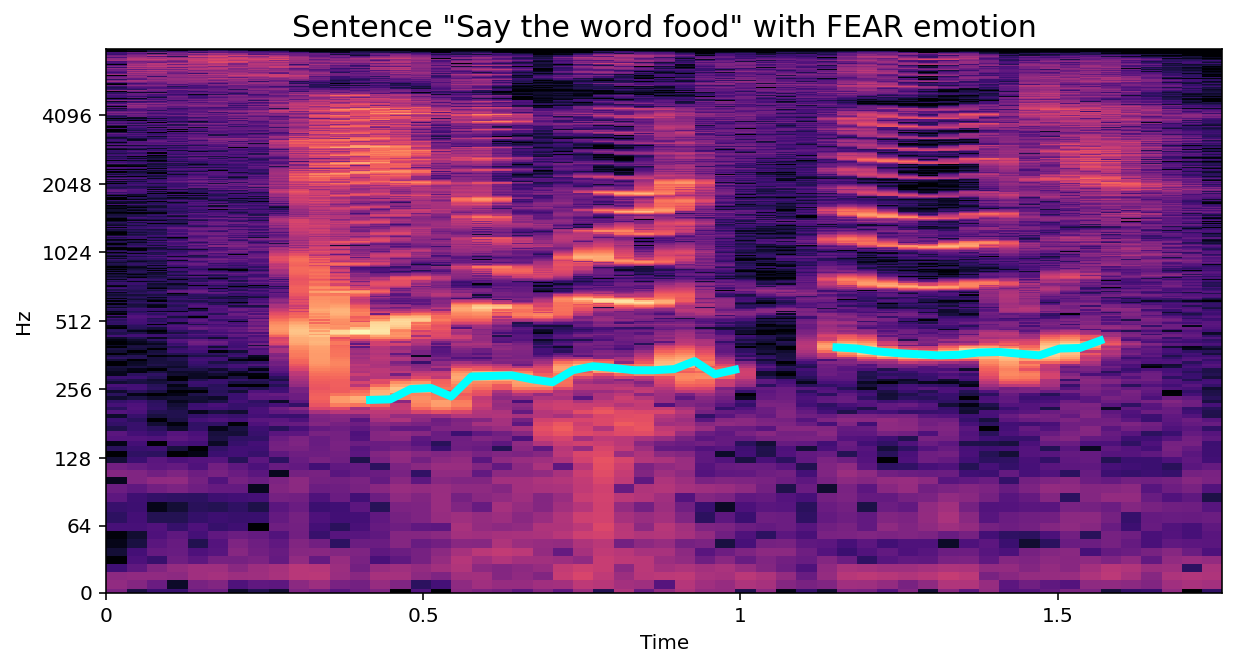

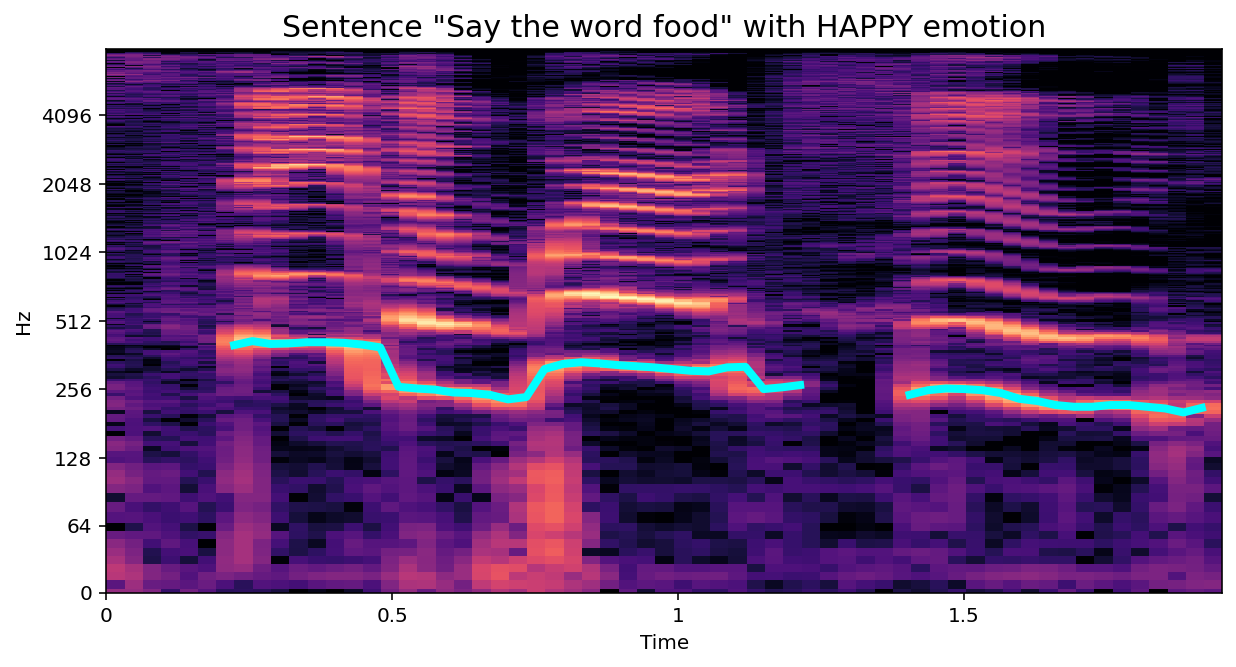

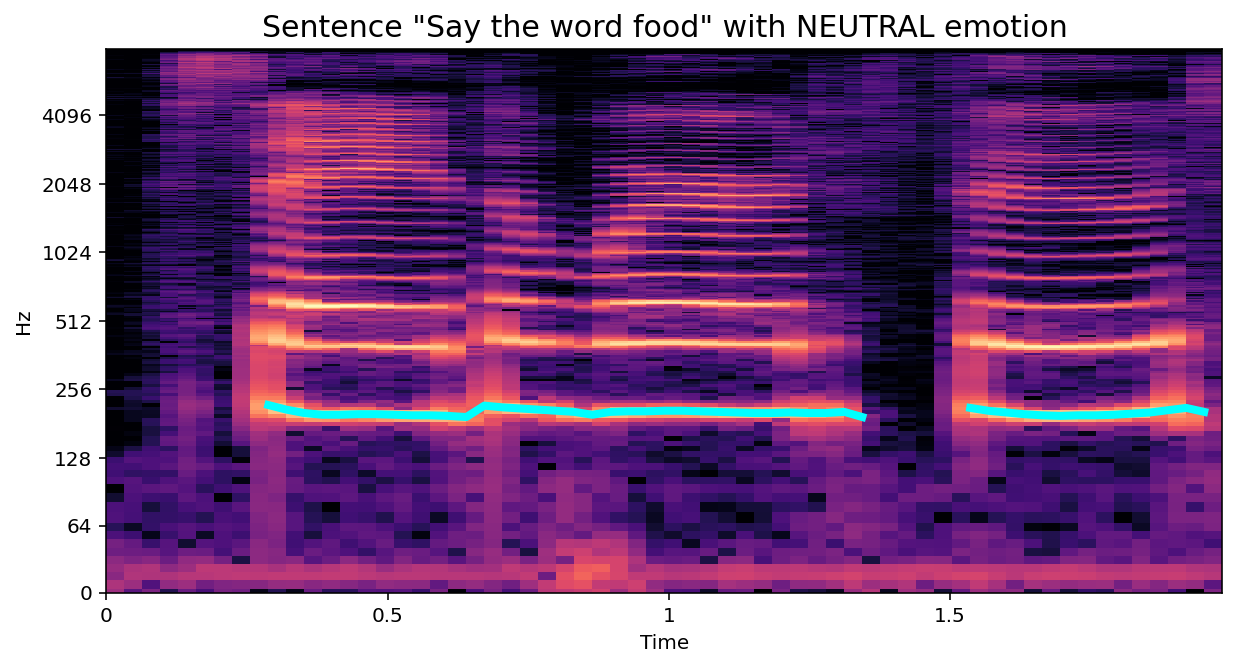

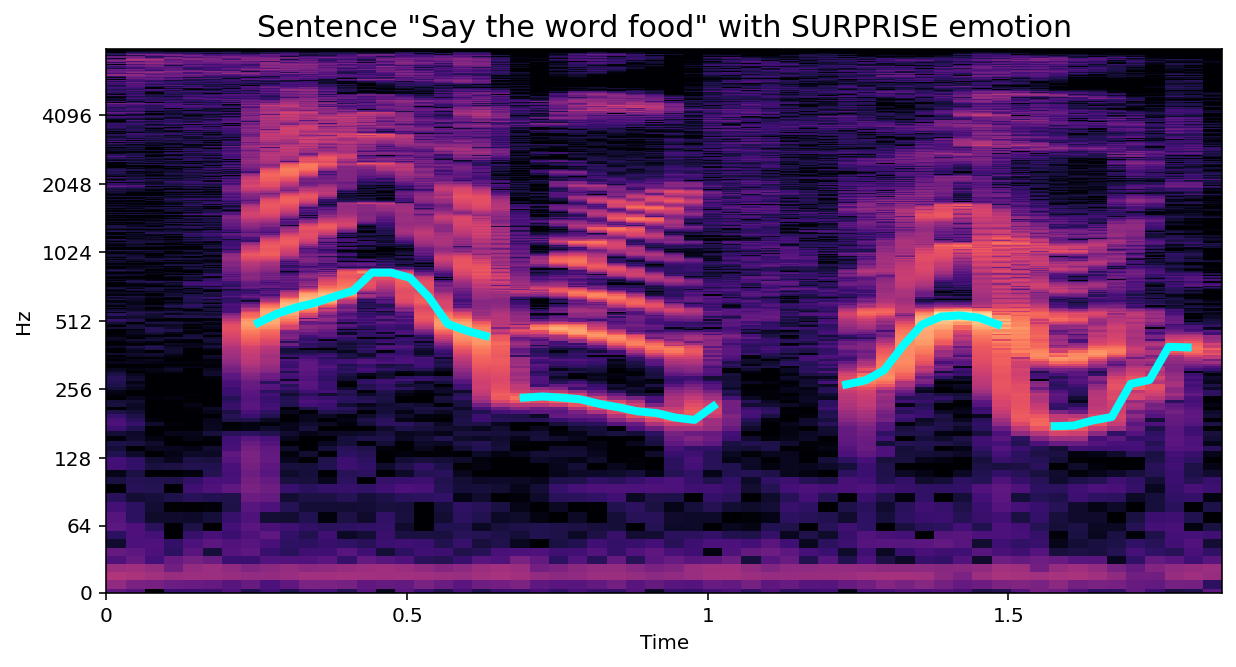

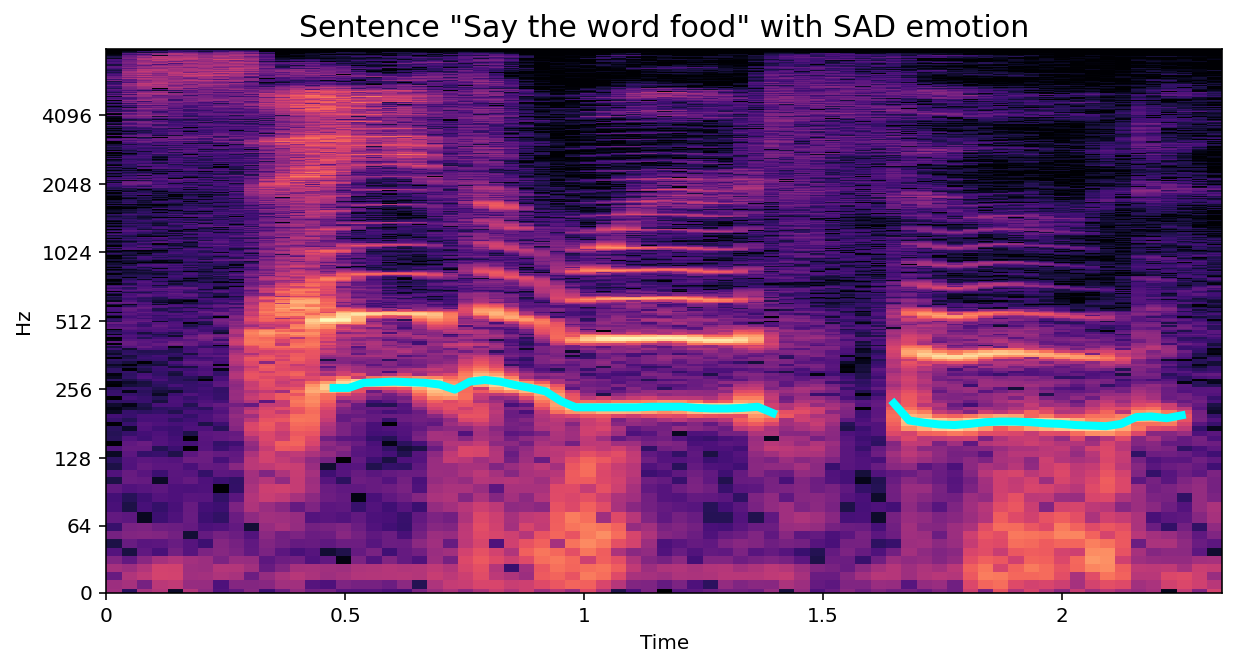

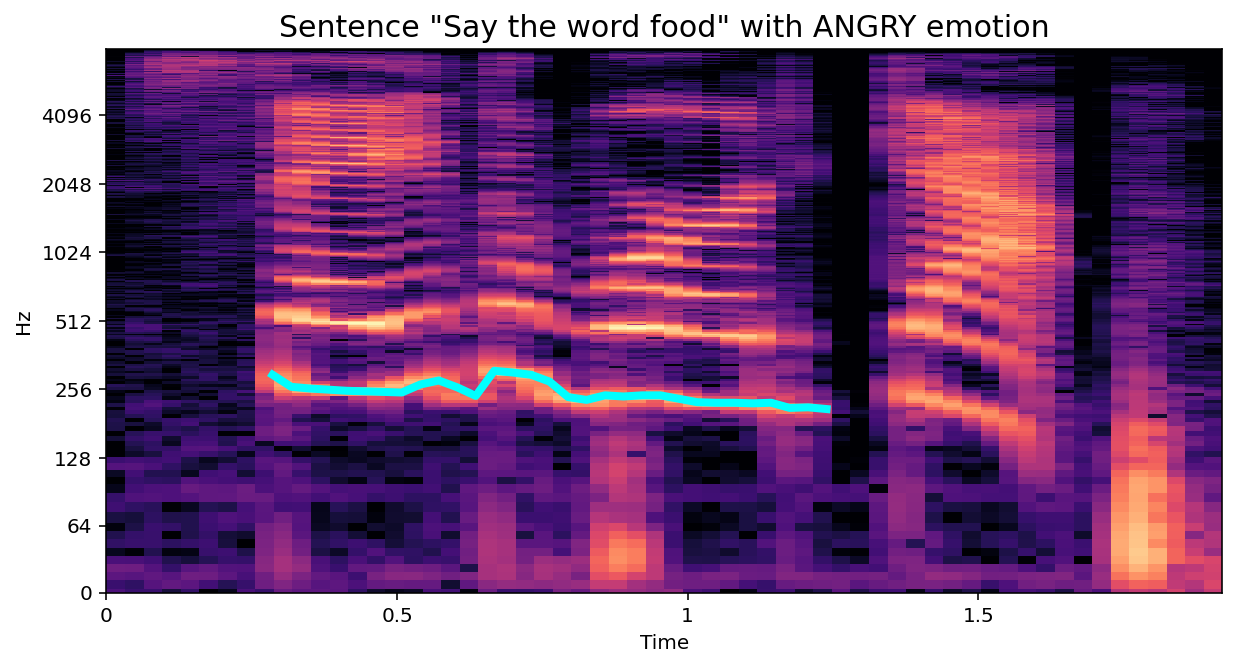

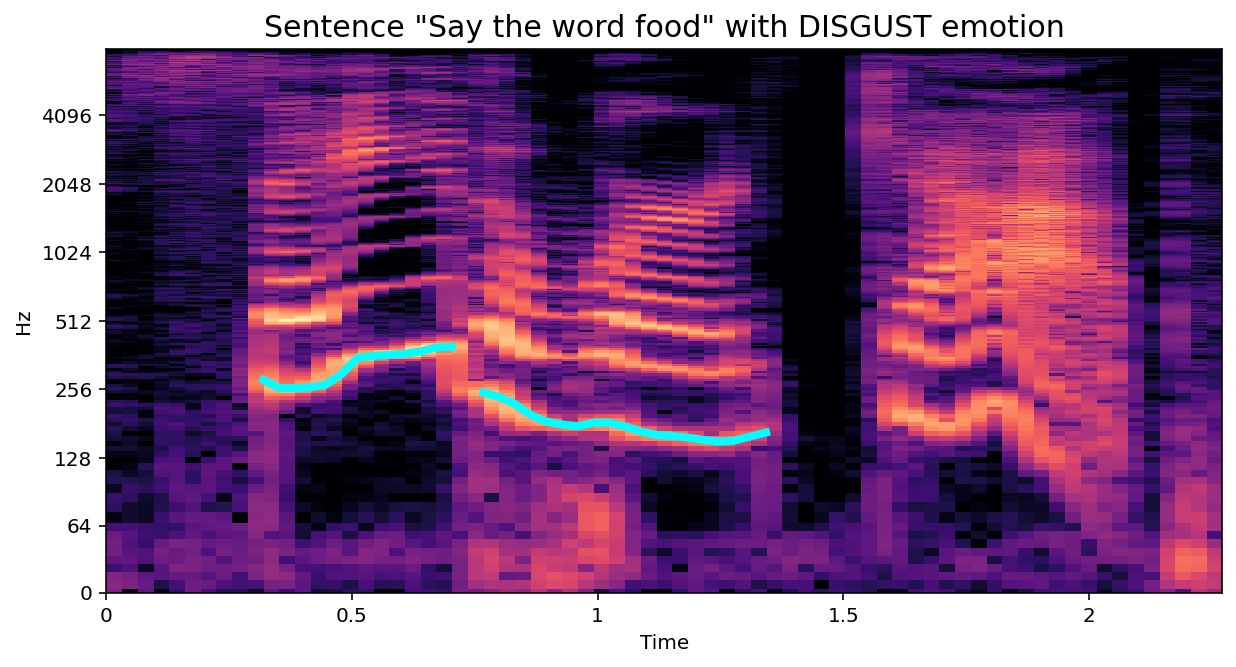

In [ ]:
def spectogram_f0(index): 
    plt.figure(figsize=(10,5))
    y, sr = librosa.load(df.iloc[index]['path'], sr=16000)                   
    duration = len(y) / sr                                                   
    f0, _, _ = librosa.pyin(y, sr=sr, fmin=50, fmax=1500, frame_length=2048) 
    timepoints = np.linspace(0, duration, num=len(f0), endpoint=False)       
    x_stft = np.abs(librosa.stft(y))                                         
    x_stft = librosa.amplitude_to_db(x_stft, ref=np.max)                     
    librosa.display.specshow(x_stft, sr=sr, x_axis="time", y_axis="log")     
    plt.plot(timepoints, f0, color="cyan", linewidth=4)                      
    display(ipd.Audio(y, rate=sr))                                           
    plt.title('Sentence "Say the word food" with {} emotion'.format((df.iloc[index]['emotion']).upper()), size=15)
    plt.show()
    
for i in range(10871, 10878):
    spectogram_f0(i)

From these spectrograms, it is interesting to note that for the same sequence of words and from the same speaker, the frequencies vary depending on the emotion being conveyed. Of course, this insight is not enough to be demonstrated from a few samples, and I will need more features to explore the characteristics of emotions.

In the next notebook I will proceed to clean the audio samples and extract the features.

In [ ]:
# Export data to .csv
df.to_csv('emotions_data.csv', index=False)

<br>[Back to top](#top)